# **Conjunto de dados flor Iris (Iris flower data set)**

# **1. Importando bibliotecas necessárias**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from scikeras.wrappers import KerasClassifier # pip install scikeras

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

# **2. Carregando o dataset**

In [ ]:
iris_df = pd.read_csv('Iris.csv')
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# **3. Análise exploratória dos dados**

In [ ]:
# Verificando as dimensões do dataset
iris_df.shape

(150, 6)

In [ ]:
# Verificando informações adicionais do dataset
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# Estatística Descritiva das Variáveis
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Verificando se há linhas duplicadas
iris_df.duplicated().sum()

0

In [ ]:
# Verificando se há valores Missing (valores ausentes) das plantas
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


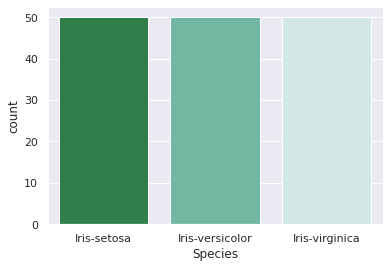

In [ ]:
# Criando um Gráfico de Barras para  mostrar a frequência da Variável "Species" (Nossa Classe a ser Predita)
sns.set_theme(style='darkgrid')
sns.countplot(iris_df['Species'], palette='BuGn_r')

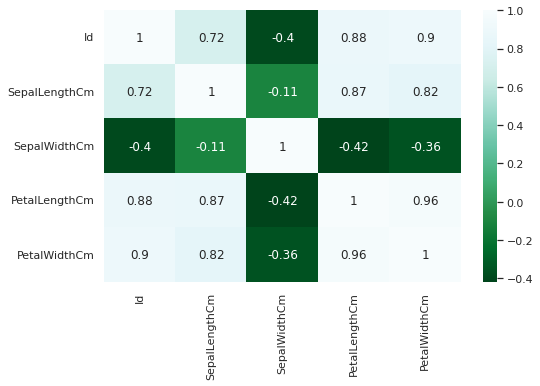

In [ ]:
# Verificando a correlação entre as variáveis
plt.figure(figsize=(8,5))
# Criação do Gráfico heatmap
sns.heatmap(iris_df.corr(), annot=True, cmap='BuGn_r')
plt.show()

# **4. Pré-Processamento dos dados**

In [ ]:
# Eliminando Variáveis desnecessárias 
iris_df = iris_df.drop('Id', axis=1)
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Trocando o tipo do atributo Species por um tipo numérico
label_encoder = LabelEncoder()
iris_df['Species'] = label_encoder.fit_transform(iris_df['Species'])
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Verificando o tipo das variáveis
iris_df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

# **5. Separação das Variáveis explicativas (X) e o Target (y) para treinamento do algoritmo na Máquina Preditiva**

In [ ]:
X = iris_df.iloc[:,0:4]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y = iris_df.Species
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

# **6. Redes Neurais (Keras)**

In [ ]:
# Transformando a variável y em uma matriz binária
y_transformado = np_utils.to_categorical(y)

In [ ]:
def Keras_MLP():
	# configurando a rede neural
	modelo = Sequential()
	modelo.add(Dense(8, input_dim=4, activation='relu'))
	modelo.add(Dense(3, activation='softmax'))
	# compilando o modelo
	modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return modelo

# 4 entradas -> [8 neurônios na camada oculta] -> 3 saídas 

## **6.1 Avaliando o modelo com validação cruzada k-Fold**

In [ ]:
classificador = KerasClassifier(model=Keras_MLP, epochs=200, batch_size=5, verbose=0)

In [ ]:
kfold = KFold(n_splits=10, shuffle=True)

In [ ]:
resultados = cross_val_score(classificador, X, y_transformado, cv=kfold)

In [ ]:
print(f'Média: {resultados.mean()*100:.2f}%\nDesvio padrão: {resultados.std()*100:.2f}')

Média: 98.00%
Desvio padrão: 3.06
